In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/car-evaluationcsv/car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
# view summary of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

# explore class variable

In [8]:
df["class"].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
# check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# declare feature vector and target variable

In [10]:
x = df.drop(["class"],axis = 1)
y = df["class"]

# split data separate training and test set

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 45)

In [12]:
# check the shape of x_train and x_test
x_train.shape,x_test.shape

((1157, 6), (570, 6))

# feature enginering
   Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.
   

In [13]:
# check data types in x_train
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

# encode categorical variables

In [14]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1478,low,high,4,more,med,low
47,vhigh,vhigh,3,more,med,low
1230,med,low,3,4,big,med
909,med,vhigh,3,more,small,med
308,vhigh,med,5more,4,med,low


We can see that all the variables are ordinal categorical data type.

In [15]:
# import category encoders
import category_encoders as ce

In [16]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [17]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1478,1,1,1,1,1,1
47,2,2,2,1,1,1
1230,3,3,2,2,2,2
909,3,2,2,1,3,2
308,2,4,3,2,1,1


In [18]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
467,4,2,2,2,3,1
617,4,1,1,1,2,1
229,2,4,4,2,1,3
1473,1,1,1,2,2,2
872,3,2,4,2,3,1


We now have training and test set ready for model building.

# Random Forest Classifier model with default parameters 

In [19]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators = 10,random_state =1)
# fit the model
rfc.fit(x_train,y_train)
# predict test set results  
y_pred = rfc.predict(x_test)
# check accuracy score
from sklearn.metrics import accuracy_score
print("model accuracy score with 10 decision trees:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

model accuracy score with 10 decision trees:0.9211


# Random Forest Classifier model with parameter n_estimators=100

In [20]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators = 100, random_state = 0)
# fit the model to the training set
rfc_100.fit(x_train,y_train)
# predict on the test set results
y_pred_100 = rfc_100.predict(x_test)
# check accuracy score
print("model accuracy score with 100 decision trees:{0:0.4f}".format(accuracy_score(y_test,y_pred_100)))

model accuracy score with 100 decision trees:0.9439


#  Find important features with Random Forest model 

In [21]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [22]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_,index = x_train.columns).sort_values(ascending = False)
feature_scores

safety      0.289972
persons     0.244606
buying      0.194339
maint       0.119668
lug_boot    0.078183
doors       0.073233
dtype: float64

# Visualize feature scores of the features

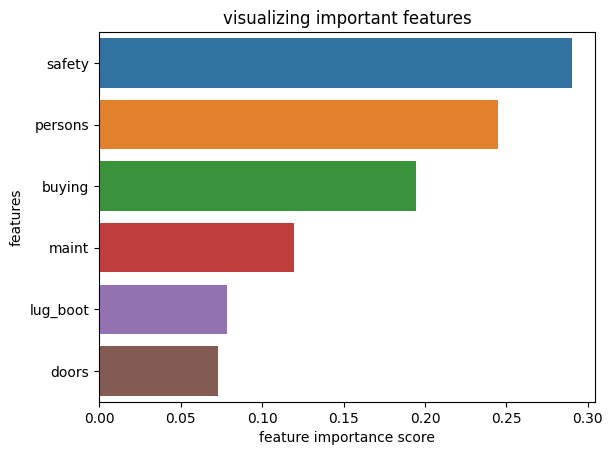

In [23]:
# creating a seaborn barplot
sns.barplot(x=feature_scores,y = feature_scores.index)
# add labels to the graph
plt.xlabel("feature importance score")
plt.ylabel("features")
# add title to the graph
plt.title("visualizing important features")
# visualize the graph
plt.show()

# Build Random Forest model on selected features 

Now, I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.

In [24]:
# declare feature vector and target variable
x = df.drop(["class","doors"],axis =1)
y = df["class"]

In [25]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state =1)

In [26]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [27]:
# instantiate the classifier with n_estimators =100
clf = RandomForestClassifier(random_state = 0)
# fit the model to the training set
clf.fit(x_train,y_train)
# predict on the test set results
y_pred = clf.predict(x_test)
# check accuracy score
print("model accuracy score with doors variable removed:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

model accuracy score with doors variable removed:0.9298


In [28]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cm)

confusion matrix
 [[119   2   4   0]
 [  3  16   3   2]
 [ 18   1 373   0]
 [  2   5   0  22]]


# classification report

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.84      0.95      0.89       125
        good       0.67      0.67      0.67        24
       unacc       0.98      0.95      0.97       392
       vgood       0.92      0.76      0.83        29

    accuracy                           0.93       570
   macro avg       0.85      0.83      0.84       570
weighted avg       0.93      0.93      0.93       570

